# Section 1: Data Introduction and Visualization

### 1.1 Data Introduction

The dataset comprises a comprehensive collection of seismic events spanning 30 years, from 1993 to 2023, in the South Japan Sea and North Philippine Sea Region. Sourced from the United States Geological Survey (USGS), a premier agency providing reliable and detailed geophysical data, this dataset encapsulates crucial information about each earthquake recorded in this seismically active zone. The data is meticulously structured across several columns, capturing the date and time of occurrence (time), geographical coordinates (latitude, longitude), focal depths (depth), and magnitudes (mag) among others, which are pivotal to understanding the seismicity of the region.

Each entry in the dataset not only quantifies the magnitude of an earthquake but also provides the type of magnitude measured (magType), the number of seismic stations reporting (nst), the angular gap between the stations (gap), and the distance to the nearest station from the epicenter (dmin). The dataset further enriches the data quality with measurements of the root mean square (RMS) of the seismic signal (rms), providing insights into the vibrations' spread. Unique identifiers (id), along with the update timestamps (updated), ensure the traceability and the currency of the information.

The dataset also includes error metrics (horizontalError, depthError, magError) that impart critical information about the precision of the recorded data, which is essential for the integrity and robustness of any subsequent analysis. The status of the data review (status), along with the sources of the location and magnitude information (locationSource, magSource), further adds to the dataset's credibility.

In essence, this dataset not only serves as a historical ledger of seismic activity but also provides a fertile ground for predictive modeling and anomaly detection through machine learning techniques. By examining patterns, trends, and outliers within this data, I aim to gain insights into the seismic behavior of the South Japan Sea region and assess the potential for significant future seismic events.

### 1.2 Data import

In [1]:
import pandas as pd

#import the datafiles
file_1993_2002 = '1993-2002.csv'
file_2003_2012 = '2003-2012.csv'
file_2013_2023 = '2013-2023.csv'

# Read the files into separate DataFrames
df1 = pd.read_csv(file_1993_2002)
df2 = pd.read_csv(file_2003_2012)
df3 = pd.read_csv(file_2013_2023)

# Combine the DataFrames into one
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Verify the combined DataFrame
print(combined_df.head())  # Prints the first 5 rows


                       time  latitude  longitude  depth  mag magType   nst  \
0  2002-12-31T14:51:38.220Z    27.486    140.105  470.6  3.6      mb  14.0   
1  2002-12-31T10:11:17.630Z    37.170    141.435   41.6  4.8      mb  51.0   
2  2002-12-30T05:31:40.040Z    37.307    142.332   33.0  3.6      mb   9.0   
3  2002-12-29T23:17:31.430Z    26.646    140.512  488.2  4.0      mb  46.0   
4  2002-12-29T16:59:49.970Z    18.718    121.353   33.0  3.7      mb  10.0   

   gap  dmin   rms  ...                   updated  \
0  NaN   NaN  0.44  ...  2014-11-07T01:17:27.002Z   
1  NaN   NaN  1.01  ...  2014-11-07T01:17:26.987Z   
2  NaN   NaN  0.60  ...  2014-11-07T01:17:26.813Z   
3  NaN   NaN  0.91  ...  2014-11-07T01:17:26.763Z   
4  NaN   NaN  0.64  ...  2014-11-07T01:17:26.680Z   

                                  place        type horizontalError  \
0           Bonin Islands, Japan region  earthquake             NaN   
1             50 km ENE of Iwaki, Japan  earthquake             NaN   

### 1.3 Data Preprocess

Here we want to categorize each earthquake as "minor", "light", "moderate", "strong", "major" and "great", according to the scales used by USGS. After that, we will drop those columns that are either empty at all or contains irrelavant information (such as sourceLocation, which is "US" because this dataset is taken from USGS).

In [2]:
# Now, drop the unnecessary columns
combined_df.drop(columns=['magType', 'gap', 'dmin', 'type', 'horizontalError', 'depthError', 'magError', 'status', 'locationSource', 'magSource'], inplace=True)

combined_df.head()


,time,latitude,longitude,depth,mag,nst,rms,net,id,updated,place,magNst
0,2002-12-31T14:51:38.220Z,27.486,140.105,470.6,3.6,14.0,0.44,us,usp000bmsy,2014-11-07T01:17:27.002Z,"Bonin Islands, Japan region",2.0
1,2002-12-31T10:11:17.630Z,37.170,141.435,41.6,4.8,51.0,1.01,us,usp000bmsq,2014-11-07T01:17:26.987Z,"50 km ENE of Iwaki, Japan",18.0
2,2002-12-30T05:31:40.040Z,37.307,142.332,33.0,3.6,9.0,0.60,us,usp000bmqc,2014-11-07T01:17:26.813Z,"119 km E of Namie, Japan",1.0
3,2002-12-29T23:17:31.430Z,26.646,140.512,488.2,4.0,46.0,0.91,us,usp000bmpz,2014-11-07T01:17:26.763Z,"Bonin Islands, Japan region",23.0
4,2002-12-29T16:59:49.970Z,18.718,121.353,33.0,3.7,10.0,0.64,us,usp000bmnx,2014-11-07T01:17:26.680Z,"22 km NNE of Santa Cruz, Philippines",2.0


In [3]:
# We sort the time by asecending order
combined_df.sort_values(by='time', ascending=True, inplace=True)

# Reset the index after sorting and drop the old index
combined_df.reset_index(drop=True, inplace=True)

combined_df.head()

,time,latitude,longitude,depth,mag,nst,rms,net,id,updated,place,magNst
0,1993-01-01T08:19:41.080Z,38.816,142.797,36.6,4.7,NaN,1.2,us,usp0005k6b,2014-11-07T00:52:08.883Z,"95 km ESE of Kamaishi, Japan",3.0
1,1993-01-02T15:10:46.690Z,34.003,141.547,44.1,4.6,NaN,1.1,us,usp0005k7y,2014-11-07T00:52:09.838Z,"169 km SE of Katsuura, Japan",21.0
2,1993-01-04T01:18:18.700Z,34.227,141.827,33.0,4.3,NaN,1.1,us,usp0005k96,2014-11-07T00:52:10.369Z,"172 km SE of Katsuura, Japan",9.0
3,1993-01-05T01:31:58.660Z,38.922,142.599,28.1,4.8,NaN,1.2,us,usp0005kag,2014-11-07T00:52:10.982Z,"74 km ESE of Kamaishi, Japan",30.0
4,1993-01-05T11:23:04.760Z,19.116,121.103,10.0,4.8,NaN,1.3,us,usp0005kay,2014-11-07T00:52:11.088Z,"Babuyan Islands region, Philippines",23.0


### 1.4 Data Visualization

The earthquake data has been sorted from in an asecending order from 1993 to 2023. We can view the magnitude of the past 100 earthquakes using a time sereis plot.

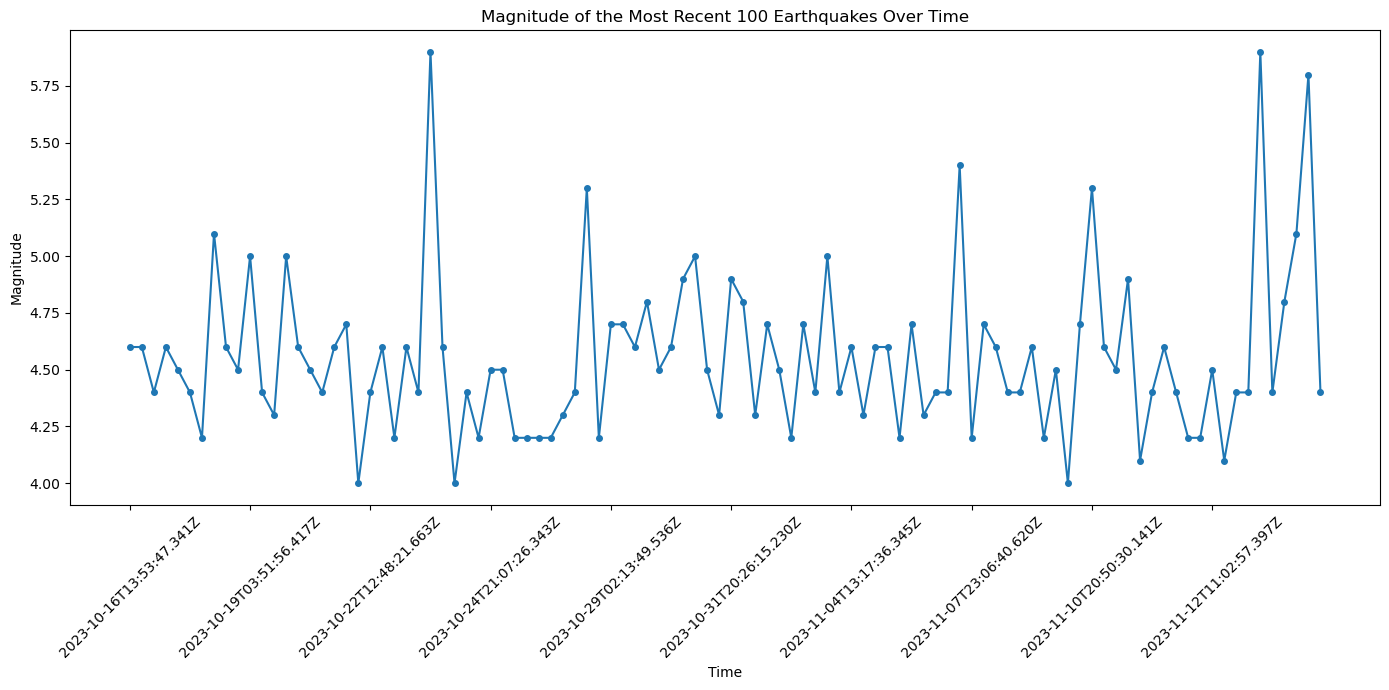

In [4]:
import matplotlib.pyplot as plt

# Select the last 100 earthquakes for visualization
recent_earthquakes = combined_df[-100:]

# Time Series Plot for the most recent 100 earthquakes
plt.figure(figsize=(14, 7))
plt.plot(recent_earthquakes['time'], recent_earthquakes['mag'], marker='o', linestyle='-', markersize=4)

# Set the frequency of the x-axis labels to show one label every 10 earthquakes
tick_spacing = 10
plt.xticks(ticks=recent_earthquakes['time'][::tick_spacing], rotation=45)

plt.title('Magnitude of the Most Recent 100 Earthquakes Over Time')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.tight_layout() 
plt.show()


The earthquake data in total has more than 40000 rows, and they have varying magnitude. It may be more suitable to look at the heatmap of all the earthquakes in the South Japan Sea and North Philippine Sea region, based on their latitude, longitude and magnitude.

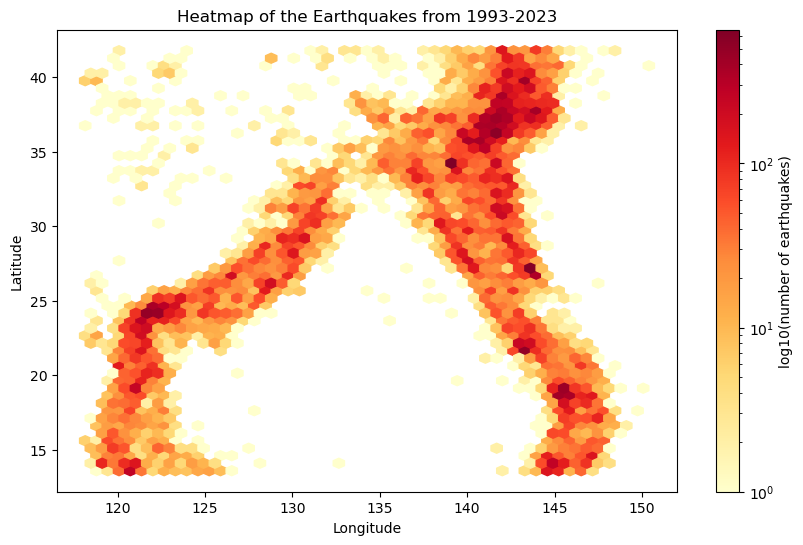

In [5]:
import matplotlib.pyplot as plt

# Create a heatmap using a hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(combined_df['longitude'], combined_df['latitude'], gridsize=50, cmap='YlOrRd', bins='log')
plt.colorbar(label='log10(number of earthquakes)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of the Earthquakes from 1993-2023')
plt.show()



# Section 2: Supervised Learning

### 2.1 Problem Outlines for Supervised Learning

In the supervised learning component of this project, I aim to predict the magnitude of the next earthquake based on the magnitudes of the previous 20 earthquakes in the target region. By leveraging the patterns of past earthquakes, using a regression model I will analyze the relationship between these sequential occurrences to estimate the magnitude of impending seismic activity. This predictive model could provide insights into the likelihood of future earthquakes and assist in risk assessment and preparedness efforts in seismically active regions.

### 2.2 Data Extraction for Supervised Learning

To prepare the features for training, I create a new dataframe from the original dataframe which extracts the previous 20 earthquakes for every earthquake (starting from the 21th early earthquake in the dataset), and i use the magnitude of the current earthquake as the ground truth.

In [6]:
import numpy as np

# Set the look-back number of earthquakes
look_back = 20

# Create a new DataFrame where each row contains the magnitudes of the last 20 earthquakes
# Each row will have 20 features (mag_1, mag_2, ..., mag_20) and a target magnitude (next_mag)

# Initialize an empty list to store each row as a DataFrame
rows_list = []

# Loop over the DataFrame to create the look-back rows
for i in range(look_back, len(combined_df)):
    # Get the last 'look_back' magnitudes
    features = combined_df['mag'].iloc[i-look_back:i].tolist()
    # Get the next magnitude
    target = combined_df['mag'].iloc[i]
    # Create a DataFrame for the row
    row_df = pd.DataFrame([features + [target]])
    # Append the DataFrame to the list
    rows_list.append(row_df)

# Concatenate all the DataFrame objects in the list into one DataFrame
features_and_target = pd.concat(rows_list, ignore_index=True)

# Name the columns appropriately
feature_columns = [f'mag_{i}' for i in range(1, look_back+1)]
features_and_target.columns = feature_columns + ['next_mag']

# Show the first few rows of the features_and_target DataFrame
features_and_target.head()



,mag_1,mag_2,mag_3,mag_4,mag_5,mag_6,mag_7,mag_8,mag_9,mag_10,...,mag_12,mag_13,mag_14,mag_15,mag_16,mag_17,mag_18,mag_19,mag_20,next_mag
0,4.7,4.6,4.3,4.8,4.8,4.5,4.2,4.8,4.3,5.4,...,4.7,4.5,4.6,4.8,4.4,5.2,5.0,5.2,5.0,4.2
1,4.6,4.3,4.8,4.8,4.5,4.2,4.8,4.3,5.4,4.7,...,4.5,4.6,4.8,4.4,5.2,5.0,5.2,5.0,4.2,4.3
2,4.3,4.8,4.8,4.5,4.2,4.8,4.3,5.4,4.7,4.7,...,4.6,4.8,4.4,5.2,5.0,5.2,5.0,4.2,4.3,4.9
3,4.8,4.8,4.5,4.2,4.8,4.3,5.4,4.7,4.7,4.5,...,4.8,4.4,5.2,5.0,5.2,5.0,4.2,4.3,4.9,4.6
4,4.8,4.5,4.2,4.8,4.3,5.4,4.7,4.7,4.5,4.6,...,4.4,5.2,5.0,5.2,5.0,4.2,4.3,4.9,4.6,6.4


In [7]:
features_and_target.shape

(47377, 21)

### 2.3 Linear Regression Model with 5-Fold Cross Validation

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and the target (y)
X = features_and_target.drop('next_mag', axis=1)
y = features_and_target['next_mag']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Perform 5-fold cross-validation and calculate the mean squared error for each fold
cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values (since they are negated for maximization)
cv_scores = -cv_scores

# Calculate the average MSE across all folds
average_cv_mse = cv_scores.mean()

print(f"5-fold Cross-Validation MSE: {average_cv_mse}")

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model using Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")


5-fold Cross-Validation MSE: 0.1939475137867309
Test MSE: 0.18723843356207812


### 2.4 Random Forest Regressor Model with 5-Fold Cross Validation

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values (since they are negated for maximization)
rf_cv_mse = -rf_cv_scores.mean()
print(f"Random Forest 5-fold CV MSE: {rf_cv_mse}")

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error on the test set
test_mse_rf = mean_squared_error(y_test, y_rf_pred)
print(f"Random Forest Test MSE: {test_mse_rf}")



Random Forest 5-fold CV MSE: 0.1967388958592809
Random Forest Test MSE: 0.1899796510130857


### 2.4.1 Hyperparameter Tuning for RFR Model

In [10]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding CV MSE
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_}")

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Predict on the test set using the best estimator
y_best_rf_pred = best_rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error on the test set
best_test_mse_rf = mean_squared_error(y_test, y_best_rf_pred)
print(f"Best Random Forest Test MSE: {best_test_mse_rf}")


Best parameters: {'max_depth': 10, 'n_estimators': 150}
Best CV MSE: 0.19325331762830986
Best Random Forest Test MSE: 0.1860654416940872


After hyperparametering tuning, the CV MSE and Test MSE both improved, but not significantly.

### 2.5 Gradient Boosting with 5-Fold Cross Validation

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Perform 5-fold cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the scores to positive values (since they are negated for maximization)
gb_cv_mse = -gb_cv_scores.mean()
print(f"Gradient Boosting 5-fold CV MSE: {gb_cv_mse}")

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Predict on the test set
y_gb_pred = gb_model.predict(X_test)

# Evaluate the model using Mean Squared Error on the test set
test_mse_gb = mean_squared_error(y_test, y_gb_pred)
print(f"Gradient Boosting Test MSE: {test_mse_gb}")



Gradient Boosting 5-fold CV MSE: 0.1932065681456563
Gradient Boosting Test MSE: 0.1864534822170588


### 2.5.1 Hyperparameter Tuning for GB Model

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize the GridSearchCV object
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search_gb.fit(X_train, y_train)

# Print the best parameters and the corresponding MSE
print(f"Best parameters: {grid_search_gb.best_params_}")
print(f"Best CV MSE: {-grid_search_gb.best_score_}")

# Get the best estimator directly
best_gb_model = grid_search_gb.best_estimator_

# Predict on the test set using the best estimator
y_best_gb_pred = best_gb_model.predict(X_test)

# Evaluate the model using Mean Squared Error on the test set
best_test_mse_gb = mean_squared_error(y_test, y_best_gb_pred)
print(f"Best Gradient Boosting Test MSE: {best_test_mse_gb}")



Best parameters: {'learning_rate': 0.05, 'n_estimators': 150}
Best CV MSE: 0.19299699635317702
Best Gradient Boosting Test MSE: 0.18657851786490492


After hyperparameter tuning, the CV MSE improved but not significantly, and Test MSE did not improve.

### 2.6 Comparison between 3 Supervised Learning Model

From the performance results, it is found that Linear Regression, Random Forest Regressor, and Gradient Boosting yielded similar results, albeit with minor variations. The Linear Regression model, with its Cross-Validation (CV) Mean Squared Error (MSE) of 0.1939 and Test MSE of 0.1872, demonstrated that a simple linear approach was surprisingly effective. This suggests that the relationship between the features and the earthquake magnitudes in my dataset might predominantly be linear, or at least can be approximated as such. However, this could be because the look back periods is too small (20 in this project), thus not enough to display the non-linear nature of seismic activities.

On the other hand, the Random Forest Regressor and Gradient Boosting models, which are more complex and capable of capturing non-linear patterns, showed a marginally improved performance. The Random Forest model achieved a CV MSE of 0.1933 and a Test MSE of 0.1861, while Gradient Boosting recorded a CV MSE of 0.1932 and a Test MSE of 0.1865. These results indicate that there are perhaps some non-linear relationships in the data, but their impact on the overall prediction accuracy is not significantly pronounced. 

In conclusion, the close performance of all three models implies that the complexity of the model does not necessarily guarantee a substantial improvement in predictive accuracy for this particular dataset. While the more advanced models slightly outperformed Linear Regression, the difference was not substantial enough to conclusively favor them, especially considering the increased computational resources and complexity they entail. This finding highlights the importance of balancing model complexity with performance and the utility of simpler models in certain scenarios.

# Section 3: Unsupervised Learning

### 3.1 Problem Outlines for Unsupervised Learning

In our unsupervised learning task, we focused on anomaly detection within a comprehensive dataset of seismic events. The objective was to identify earthquake occurrences that deviate significantly from established patterns, which are indicative of typical seismic activity. 

### 3.2 Data Extraction for Unsupervised Learning

In order to study the earthquake patterns, we focus on these attributes: latitude, longitude, depth, magnitude and rms signal. These attributes reflects the location and impact of a particular earthquake. Meanwhile, we use the time for each earthquake to index them.

In [22]:
# Set the "time" as index
X_index = combined_df.set_index('time')

# Extract the features X
X = X_index[['latitude', 'longitude', 'depth', 'mag', 'rms']]

# Fill NaN values with the mean of each column
X = X.fillna(X.mean())


### 3.3 K-Means Clustering

We use Elbow method to find the best K value.

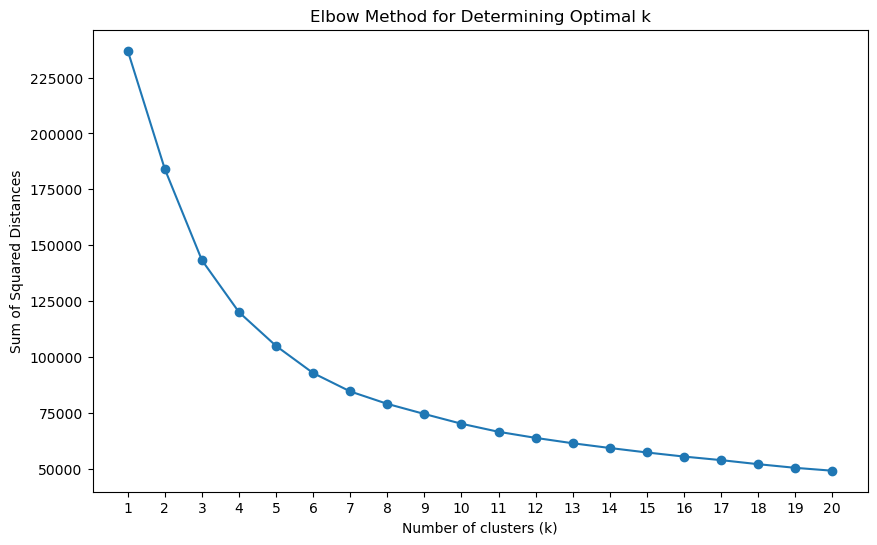

In [23]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Using the Elbow method to find the optimal number of clusters
ssd = []  # Sum of squared distances for each k
for k in range(1, 21):  # Trying different numbers of clusters, here from 1 to 20
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), ssd, marker='o')
plt.title('Elbow Method for Determining Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.xticks(range(1, 21))
plt.show()



From the graph, we estimate that K = 5 because any increase after K = 5 becomes flatterned.

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Calculate the distance from each point to its cluster center
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[clusters], axis=1)

# Determine the threshold for flagging an anomaly
threshold = np.mean(distances) + 2 * np.std(distances)

# Flag data points that are beyond the threshold as anomalies
anomalies = distances > threshold

# Get the times of the anomalous earthquakes
anomaly_times = X.index[anomalies].tolist()

anomaly_times



['1993-01-18T01:18:06.340Z',
 '1993-01-19T14:39:26.170Z',
 '1993-01-20T07:09:39.180Z',
 '1993-01-23T08:59:25.060Z',
 '1993-02-03T03:24:28.420Z',
 '1993-02-03T16:51:46.300Z',
 '1993-02-07T13:27:42.010Z',
 '1993-02-19T08:17:03.830Z',
 '1993-03-07T19:40:57.420Z',
 '1993-03-19T22:11:52.930Z',
 '1993-03-20T06:19:31.860Z',
 '1993-04-02T14:32:19.090Z',
 '1993-04-09T11:35:38.160Z',
 '1993-05-17T10:21:45.560Z',
 '1993-05-18T10:19:33.780Z',
 '1993-05-23T05:18:21.910Z',
 '1993-06-05T03:04:12.890Z',
 '1993-06-06T13:23:20.860Z',
 '1993-06-26T06:15:00.720Z',
 '1993-07-05T15:20:57.760Z',
 '1993-07-07T11:10:53.330Z',
 '1993-07-07T20:53:24.950Z',
 '1993-07-20T13:26:04.640Z',
 '1993-07-22T12:15:36.150Z',
 '1993-08-02T03:13:21.600Z',
 '1993-08-07T00:00:37.070Z',
 '1993-08-19T05:56:41.020Z',
 '1993-08-20T11:52:04.600Z',
 '1993-09-01T00:41:23.320Z',
 '1993-09-03T05:00:46.240Z',
 '1993-09-12T21:27:52.460Z',
 '1993-09-27T04:43:55.600Z',
 '1993-10-04T06:39:16.120Z',
 '1993-10-11T15:54:21.240Z',
 '1993-10-28T1

In [35]:
print('Number of Anomalies:')
print(len(anomaly_times))


Number of Anomalies:
1864


In [36]:
print('Fraction of Anomalies:')
print(len(anomaly_times)/len(X))

Fraction of Anomalies:
0.039327383589678674


From the above analysis, we have found 1864 anomalies, which consists of about 3.9% of the total earthquakes.

### 3.3.1 K-Means Clustering with PCA

Let us try to use PCA to reduce dimentionality and find the key attributes, and then compare the performance with the original K-Means performance.

In [33]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to perform feature reduction while retaining 80% of the variance
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

# Perform K-Means clustering with the PCA-transformed features
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(X_pca)

# Assign clusters based on PCA-transformed features
clusters_pca = kmeans_pca.predict(X_pca)

# Calculate distances from each point to its cluster center in the transformed feature space
distances_pca = np.linalg.norm(X_pca - kmeans_pca.cluster_centers_[clusters_pca], axis=1)

# Determine the threshold for flagging an anomaly
threshold_pca = np.mean(distances_pca) + 2 * np.std(distances_pca)

# Flag data points beyond the threshold as anomalies
anomalies_pca = distances_pca > threshold_pca

# Extract the times associated with the anomalous data points
anomaly_times_pca = X.index[anomalies_pca].tolist()

# Output the anomaly times
anomaly_times_pca


['1993-01-18T01:18:06.340Z',
 '1993-01-19T14:39:26.170Z',
 '1993-01-20T07:09:39.180Z',
 '1993-01-23T08:59:25.060Z',
 '1993-02-03T03:24:28.420Z',
 '1993-02-03T16:51:46.300Z',
 '1993-02-07T13:27:42.010Z',
 '1993-02-19T08:17:03.830Z',
 '1993-03-19T22:11:52.930Z',
 '1993-03-20T06:19:31.860Z',
 '1993-04-02T14:32:19.090Z',
 '1993-04-09T11:35:38.160Z',
 '1993-04-16T21:10:11.900Z',
 '1993-05-17T10:21:45.560Z',
 '1993-05-18T10:19:33.780Z',
 '1993-05-23T05:18:21.910Z',
 '1993-06-05T03:04:12.890Z',
 '1993-06-06T13:23:20.860Z',
 '1993-06-19T14:31:14.270Z',
 '1993-06-26T06:15:00.720Z',
 '1993-07-05T15:20:57.760Z',
 '1993-07-07T04:51:48.340Z',
 '1993-07-07T20:53:24.950Z',
 '1993-07-20T13:26:04.640Z',
 '1993-07-28T23:17:14.410Z',
 '1993-08-07T00:00:37.070Z',
 '1993-08-16T17:11:50.520Z',
 '1993-08-19T05:56:41.020Z',
 '1993-08-20T11:52:04.600Z',
 '1993-09-03T05:00:46.240Z',
 '1993-09-11T17:36:46.330Z',
 '1993-09-12T21:27:52.460Z',
 '1993-09-17T21:02:56.900Z',
 '1993-10-04T06:39:16.120Z',
 '1993-10-05T0

In [34]:
print('Number of Anomalies with PCA:')
print(len(anomaly_times_pca))


Number of Anomalies with PCA:
1975


In [37]:
print('Fraction of Anomalies with PCA:')
print(len(anomaly_times_pca)/len(X))

Fraction of Anomalies with PCA:
0.04166930396438593


Applying PCA with the retention of 80% variance before conducting K-Means clustering led to a slight increase in the fraction of detected anomalies, from 3.9% to 4.2%. This increase can be attributed to PCA's ability to accentuate the variance along the principal components, potentially making outliers more pronounced when considering the reduced feature space. The shift suggests that, in the reduced dimensionality, the anomalies became more distinct from the 'normal' data points as defined by the clustering algorithm. This is an expected outcome since PCA often clarifies the structure of the data by emphasizing the most significant relationships.

### 3.4 DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
# The parameters eps and min_samples need to be tuned based on your dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Anomalies are the points labeled as -1
anomalies_dbscan = clusters == -1

# Add the anomaly flags to the DataFrame
X['anomaly_dbscan'] = anomalies_dbscan

# Get the times of the anomalous earthquakes identified by DBSCAN
anomaly_times_dbscan = X.index[X['anomaly_dbscan']].tolist()

# Return the times of the anomalous earthquakes
anomaly_times_dbscan



['1993-01-18T01:18:06.340Z',
 '1993-01-19T14:39:26.170Z',
 '1993-01-30T13:09:00.310Z',
 '1993-02-03T03:24:28.420Z',
 '1993-02-07T13:27:42.010Z',
 '1993-02-15T01:05:15.520Z',
 '1993-02-19T08:17:03.830Z',
 '1993-03-14T23:18:51.220Z',
 '1993-03-16T17:52:59.050Z',
 '1993-03-20T06:19:31.860Z',
 '1993-03-20T11:02:20.440Z',
 '1993-04-02T10:05:47.730Z',
 '1993-04-25T06:48:46.570Z',
 '1993-05-18T10:19:33.780Z',
 '1993-05-23T05:18:21.910Z',
 '1993-06-05T03:04:12.890Z',
 '1993-06-06T13:23:20.860Z',
 '1993-06-26T06:15:00.720Z',
 '1993-07-07T20:53:24.950Z',
 '1993-07-22T12:15:36.150Z',
 '1993-07-28T23:17:14.410Z',
 '1993-08-07T00:00:37.070Z',
 '1993-08-18T20:06:49.260Z',
 '1993-08-19T05:56:41.020Z',
 '1993-08-20T11:52:04.600Z',
 '1993-09-12T21:27:52.460Z',
 '1993-09-27T07:44:19.600Z',
 '1993-10-03T10:54:26.660Z',
 '1993-10-11T15:54:21.240Z',
 '1993-10-28T12:58:05.650Z',
 '1993-11-12T14:16:29.990Z',
 '1993-11-12T15:28:12.100Z',
 '1993-11-27T06:11:22.680Z',
 '1993-12-12T05:15:24.520Z',
 '1993-12-12T1

In [39]:
print('Number of Anomalies:')
print(len(anomaly_times_dbscan))


Number of Anomalies:
1072


In [41]:
print('Fraction of Anomalies with PCA:')
print(len(anomaly_times_dbscan)/len(X))

Fraction of Anomalies with PCA:
0.02261746524041606


### 3.4.1 DBSCAN with PCA

Let us try to use PCA to reduce dimentionality and find the key attributes, and then compare the performance with the original DBSCAN performance.

In [42]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensions while retaining 80% of the variance
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN on the PCA-transformed data
# The parameters eps and min_samples need to be tuned based on your dataset
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
clusters_pca = dbscan_pca.fit_predict(X_pca)

# Anomalies are the points labeled as -1 in the PCA-transformed data
anomalies_dbscan_pca = clusters_pca == -1

# Assuming 'df' is the original DataFrame with the 'time' index
# Add the anomaly flags to the DataFrame
X['anomaly_dbscan_pca'] = anomalies_dbscan_pca

# Get the times of the anomalous earthquakes identified by DBSCAN with PCA
anomaly_times_dbscan_pca = X.index[X['anomaly_dbscan_pca']].tolist()

# Return the times of the anomalous earthquakes
anomaly_times_dbscan_pca



['1993-01-18T01:18:06.340Z',
 '1993-01-19T14:39:26.170Z',
 '1993-01-30T13:09:00.310Z',
 '1993-02-03T03:24:28.420Z',
 '1993-02-07T13:27:42.010Z',
 '1993-02-15T01:05:15.520Z',
 '1993-03-14T23:18:51.220Z',
 '1993-03-16T17:52:59.050Z',
 '1993-03-20T06:19:31.860Z',
 '1993-03-20T11:02:20.440Z',
 '1993-04-02T10:05:47.730Z',
 '1993-04-25T06:48:46.570Z',
 '1993-05-18T10:19:33.780Z',
 '1993-05-23T05:18:21.910Z',
 '1993-06-05T03:04:12.890Z',
 '1993-06-06T13:23:20.860Z',
 '1993-06-26T06:15:00.720Z',
 '1993-07-07T20:53:24.950Z',
 '1993-07-22T12:15:36.150Z',
 '1993-07-28T23:17:14.410Z',
 '1993-08-07T00:00:37.070Z',
 '1993-08-18T20:06:49.260Z',
 '1993-08-19T05:56:41.020Z',
 '1993-08-20T11:52:04.600Z',
 '1993-09-12T21:27:52.460Z',
 '1993-09-27T07:44:19.600Z',
 '1993-10-03T10:54:26.660Z',
 '1993-10-11T15:54:21.240Z',
 '1993-10-28T12:58:05.650Z',
 '1993-11-12T14:16:29.990Z',
 '1993-11-12T15:28:12.100Z',
 '1993-11-27T06:11:22.680Z',
 '1993-12-12T05:15:24.520Z',
 '1993-12-12T15:43:04.380Z',
 '1994-01-05T0

In [43]:
print('Number of Anomalies:')
print(len(anomaly_times_dbscan_pca))

Number of Anomalies:
996


In [44]:
print('Fraction of Anomalies with PCA:')
print(len(anomaly_times_dbscan_pca)/len(X))

Fraction of Anomalies with PCA:
0.02101398822710298


The reduction in anomaly detection from 2.2% to 2.1% after applying PCA before DBSCAN is likely due to PCA's dimensionality reduction, which alters data density and noise levels. PCA concentrates on the most variance-significant components, potentially deemphasizing anomalies that don't contribute significantly to this variance. This process can lead to a more densely packed data representation, with fewer points identified as outliers by DBSCAN. While PCA helps in highlighting the most distinct anomalies by removing less informative variations, it may also obscure some genuine anomalies by losing certain relevant information in the dimensionality reduction process.

### 3.5 Comparison between 2 Unsupervised Learning Model

In comparing the performance of K-Means clustering and DBSCAN for anomaly detection in our seismic dataset, we observed distinct differences rooted in the inherent nature of these algorithms. K-Means, a centroid-based clustering method, identified approximately 3.9% of the data points as anomalies, and 4.2% after integrating PCA. This method relies on the assumption that data points form spherical clusters around centroids, making it effective in datasets where such a structure is prominent. Anomalies in K-Means are typically those points that lie far from the nearest cluster center, leading to a broader identification of deviations that include both mild and extreme outliers.

DBSCAN, on the other hand, a density-based clustering approach, flagged about 2.2% of the points as anomalies before PCA, and 2.1% after applying PCA. This algorithm defines anomalies as points in low-density regions, effectively isolating the most distinct outliers. DBSCAN's ability to handle varying densities and shapes of clusters makes it adept at identifying points that significantly deviate from any dense cluster of data. 

The variance in anomaly detection rates between these two models highlights their methodological differences. K-Means tends to capture a wider range of anomalies due to its reliance on distance from cluster centers, potentially including points that are less extreme. DBSCAN's focus on density and core points leads to a more conservative, yet arguably more precise, identification of anomalies. This comparison underscores the importance of choosing the right model based on dataset characteristics and the specific nature of the anomalies being sought.